In [23]:
import pandas as pd
import numpy as np
import json
from glob import glob

In [32]:
import os
import pickle
import sys
from pathlib import Path

import pandas as pd
from tqdm import tqdm_notebook as tpdm

def load_pickle(file_path):
    max_bytes = 2 ** 31 - 1
    input_size = os.path.getsize(file_path)
    bytes_in = bytearray(0)
    with open(file_path, "rb") as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    obj = pickle.loads(bytes_in)
    return obj

In [2]:
output_path = "../output/014_add_groupby_genre/"

In [3]:
with open(output_path + "seed_000/output.json") as f:
    output_dict = json.load(f)

In [10]:
output_dict["eval_results"]["evals_result"]["feature_importance"].keys()

dict_keys(['max_User_Count_groupby_Publisher', 'sum_User_Count_groupby_Publisher', 'diff_mean_User_Count_groupby_Platform', 'std_Critic_Count_groupby_Publisher', 'min_Critic_Count_groupby_Platform', 'max_Critic_Count_groupby_Publisher', 'count_rating_3_0_groupby_publisher', 'count_year_of_release_2010_0_groupby_publisher', 'sum_Critic_Count_groupby_Publisher', 'count_year_of_release_2011_0_groupby_publisher', 'count_publisher_311_0_groupby_platform', 'ratio_mean_User_Count_groupby_Platform', 'count_publisher_324_0_groupby_platform', 'count_publisher_292_0_groupby_platform', 'std_User_Count_groupby_Publisher', 'count_year_of_release_1991_0_groupby_publisher', 'nunique_Developer_groupby_Publisher', 'ratio_std_User_Count_groupby_Platform', 'count_publisher_449_0_groupby_platform', 'max_Year_of_Release_groupby_Platform', 'count_publisher_268_0_groupby_platform', 'count_rating_0_0_groupby_platform', 'count_publisher_155_0_groupby_platform', 'ratio_sum_User_Count_groupby_Platform', 'count_ye

In [11]:
feature_names = output_dict["eval_results"]["evals_result"]["feature_importance"].keys()

In [35]:
importances = pd.DataFrame(index=feature_names)

In [36]:
importances

""
max_User_Count_groupby_Publisher
sum_User_Count_groupby_Publisher
diff_mean_User_Count_groupby_Platform
std_Critic_Count_groupby_Publisher
min_Critic_Count_groupby_Platform
...
count_publisher_32_0_groupby_genre
count_publisher_3_0_groupby_platform
count_publisher_2_0_groupby_platform
count_year_of_release_1988_0_groupby_Developer


In [37]:
for seed, models_path in tpdm(enumerate(np.sort(glob(str(output_path) + "/*/model.pkl")))):
    models = load_pickle(models_path)
    for i, model in enumerate(models):
        importances_tmp = pd.DataFrame(
            model.feature_importances_,
            columns=[f"gain_{i + 1}_{seed}"],
            index=feature_names,
        )
        importances = importances.join(importances_tmp, how="inner")

/home/karunru/.pyenv/versions/miniconda3-4.7.12/envs/rapids-0.16/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [90]:
importances

,gain_1_0,gain_2_0,gain_3_0,gain_4_0,gain_5_0,gain_1_1,gain_2_1,gain_3_1,gain_4_1,gain_5_1,...,gain_1_98,gain_2_98,gain_3_98,gain_4_98,gain_5_98,gain_1_99,gain_2_99,gain_3_99,gain_4_99,gain_5_99
max_User_Count_groupby_Publisher,0.000285,0.000327,0.000339,0.000242,0.000337,0.000259,0.000296,0.000320,0.000293,0.000334,...,0.000256,0.000322,0.000392,0.000288,0.000312,0.000284,0.000335,0.000297,0.000274,0.000362
sum_User_Count_groupby_Publisher,0.000062,0.000143,0.000152,0.000059,0.000099,0.000053,0.000112,0.000124,0.000070,0.000140,...,0.000083,0.000082,0.000098,0.000084,0.000122,0.000084,0.000109,0.000103,0.000067,0.000107
diff_mean_User_Count_groupby_Platform,0.000884,0.000364,0.000934,0.000739,0.000381,0.000602,0.000420,0.000598,0.000677,0.000460,...,0.000719,0.000452,0.000574,0.000761,0.000457,0.000560,0.000551,0.000561,0.000680,0.000634
std_Critic_Count_groupby_Publisher,0.000071,0.000103,0.000188,0.000119,0.000145,0.000092,0.000124,0.000171,0.000190,0.000097,...,0.000092,0.000109,0.000239,0.000160,0.000129,0.000055,0.000103,0.000200,0.000143,0.000123
min_Critic_Count_groupby_Platform,0.000110,0.000072,0.000079,0.000071,0.000064,0.000095,0.000066,0.000121,0.000064,0.000077,...,0.000099,0.000067,0.000076,0.000076,0.000085,0.000084,0.000070,0.000100,0.000075,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
count_publisher_32_0_groupby_genre,0.000254,0.000403,0.000000,0.000391,0.001297,0.000525,0.000000,0.000000,0.000432,0.000407,...,0.000411,0.000492,0.000000,0.000240,0.001016,0.000246,0.001001,0.000000,0.000396,0.000149
count_publisher_3_0_groupby_platform,0.001068,0.001427,0.000916,0.000503,0.000651,0.000945,0.000875,0.000524,0.000670,0.000454,...,0.000871,0.000848,0.000499,0.000807,0.000405,0.000865,0.001448,0.000745,0.000795,0.000253
count_publisher_2_0_groupby_platform,0.000954,0.000669,0.000605,0.000419,0.000521,0.001210,0.001025,0.000629,0.000659,0.000463,...,0.000712,0.000693,0.000772,0.000463,0.000497,0.000728,0.000428,0.000295,0.000357,0.000321
count_year_of_release_1988_0_groupby_Developer,0.000638,0.000376,0.000436,0.000700,0.000761,0.000442,0.001554,0.000429,0.000642,0.000877,...,0.000526,0.000641,0.000519,0.000513,0.000394,0.000386,0.001121,0.000504,0.000704,0.000878


In [111]:
feature_importance = importances.mean(axis=1)

In [112]:
feature_importance

max_User_Count_groupby_Publisher                  0.000307
sum_User_Count_groupby_Publisher                  0.000099
diff_mean_User_Count_groupby_Platform             0.000617
std_Critic_Count_groupby_Publisher                0.000129
min_Critic_Count_groupby_Platform                 0.000089
                                                    ...   
count_publisher_32_0_groupby_genre                0.000275
count_publisher_3_0_groupby_platform              0.000810
count_publisher_2_0_groupby_platform              0.000657
count_year_of_release_1988_0_groupby_Developer    0.000677
count_publisher_1_0_groupby_platform              0.000575
Length: 1227, dtype: float32

In [113]:
feature_importance = importances.unstack().reset_index()[["level_1", 0]]

In [114]:
feature_importance.columns = ["feature", "importance"]

In [115]:
feature_importance

,feature,importance
0,max_User_Count_groupby_Publisher,0.000285
1,sum_User_Count_groupby_Publisher,0.000062
2,diff_mean_User_Count_groupby_Platform,0.000884
3,std_Critic_Count_groupby_Publisher,0.000071
4,min_Critic_Count_groupby_Platform,0.000110
...,...,...
613495,count_publisher_32_0_groupby_genre,0.000149
613496,count_publisher_3_0_groupby_platform,0.000253
613497,count_publisher_2_0_groupby_platform,0.000321
613498,count_year_of_release_1988_0_groupby_Developer,0.000878


In [116]:
mean_importances = feature_importance.groupby("feature").mean().reset_index()

In [117]:
mean_importances.columns = ["feature", "mean_importance"]

In [121]:
mean_importances = mean_importances.sort_values("mean_importance", ascending=False)

In [122]:
mean_importances

,feature,mean_importance
738,count_year_of_release_1990_0_groupby_platform,1.815792e-02
490,count_publisher_449_0_groupby_platform,1.434469e-02
1071,ratio_max_Critic_Count_groupby_Genre,1.249261e-02
97,count_platform_27_groupby_publisher,1.113158e-02
1029,min_Year_of_Release_groupby_Platform,1.071375e-02
...,...,...
211,count_publisher_169_0_groupby_platform,1.625586e-06
1187,ratio_sum_Year_of_Release_groupby_Publisher,1.445402e-06
1097,ratio_mean_Critic_Score_groupby_Publisher,6.834780e-08
246,count_publisher_202_0_groupby_genre,0.000000e+00


In [123]:
dict(zip(mean_importances["feature"], mean_importances["mean_importance"]))

{'count_year_of_release_1990_0_groupby_platform': 0.018157921731472015,
 'count_publisher_449_0_groupby_platform': 0.01434469223022461,
 'ratio_max_Critic_Count_groupby_Genre': 0.01249261200428009,
 'count_platform_27_groupby_publisher': 0.011131576262414455,
 'min_Year_of_Release_groupby_Platform': 0.010713749565184116,
 'max_Year_of_Release_groupby_Publisher': 0.01011520717293024,
 'max_Year_of_Release_groupby_Platform': 0.010018747299909592,
 'nunique_Developer_groupby_Publisher': 0.009532080963253975,
 'count_rating_4_0_groupby_genre': 0.009244906716048717,
 'std_User_Score_groupby_Developer': 0.00885527953505516,
 'count_year_of_release_1993_0_groupby_genre': 0.008494311012327671,
 'count_publisher_62_0_groupby_genre': 0.008116096258163452,
 'count_publisher_103_0_groupby_genre': 0.007308547850698233,
 'count_publisher_292_0_groupby_platform': 0.006779536604881287,
 'min_Critic_Score_groupby_Publisher': 0.006286392454057932,
 'count_publisher_18_0_groupby_genre': 0.006137112155556

In [99]:
mean_importances = mean_importances.sort_values("mean_importance", ascending=False)[:50].reset_index(drop=True)

In [100]:
mean_importances

,feature,mean_importance
0,count_year_of_release_1990_0_groupby_platform,0.018158
1,count_publisher_449_0_groupby_platform,0.014345
2,ratio_max_Critic_Count_groupby_Genre,0.012493
3,count_platform_27_groupby_publisher,0.011132
4,min_Year_of_Release_groupby_Platform,0.010714
5,max_Year_of_Release_groupby_Publisher,0.010115
6,max_Year_of_Release_groupby_Platform,0.010019
7,nunique_Developer_groupby_Publisher,0.009532
8,count_rating_4_0_groupby_genre,0.009245
9,std_User_Score_groupby_Developer,0.008855


In [101]:
feature_importance = pd.merge(feature_importance, mean_importances, how="inner", on="feature")

In [102]:
feature_importance

,feature,importance,mean_importance
0,count_publisher_292_0_groupby_platform,0.001385,0.00678
1,count_publisher_292_0_groupby_platform,0.000784,0.00678
2,count_publisher_292_0_groupby_platform,0.013892,0.00678
3,count_publisher_292_0_groupby_platform,0.002566,0.00678
4,count_publisher_292_0_groupby_platform,0.004347,0.00678
...,...,...,...
24995,count_year_of_release_1996_0_groupby_genre,0.001013,0.00313
24996,count_year_of_release_1996_0_groupby_genre,0.002547,0.00313
24997,count_year_of_release_1996_0_groupby_genre,0.002238,0.00313
24998,count_year_of_release_1996_0_groupby_genre,0.000976,0.00313


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='importance', ylabel='feature'>

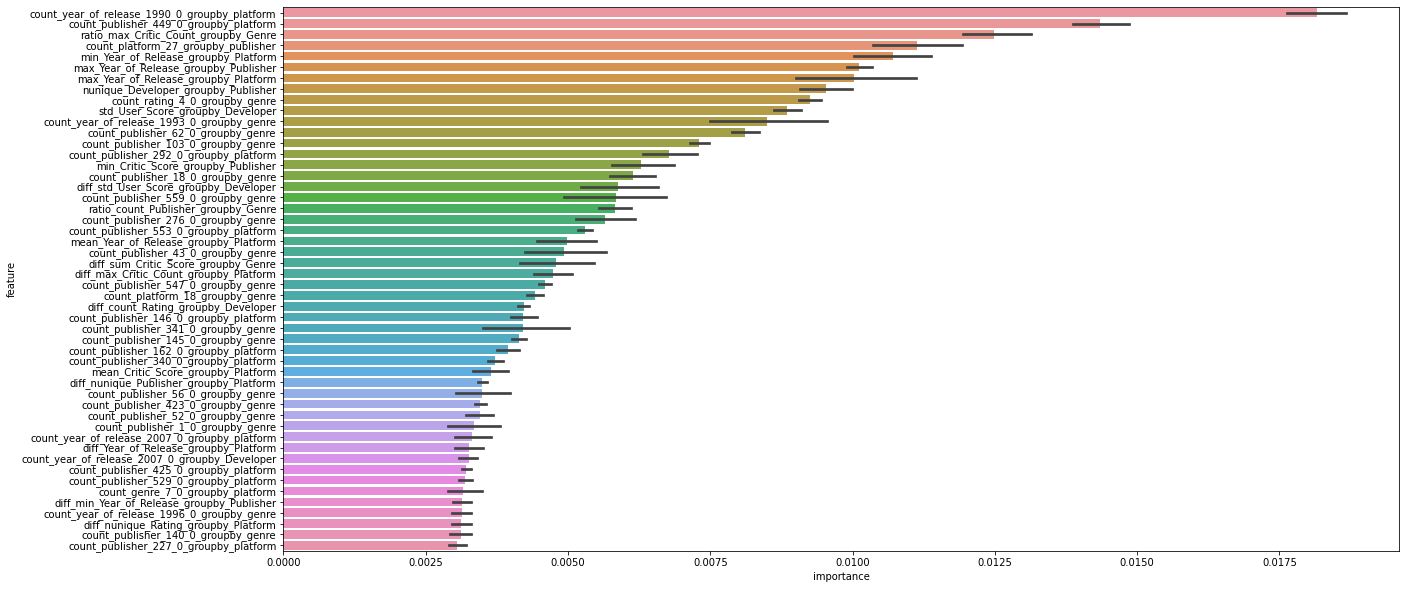

In [104]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance.sort_values('mean_importance', ascending=False))